## Overview of the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
wine_quality=pd.read_csv('./data/winequality-red.csv')
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


In [3]:
wine_quality.columns=['fixed_acidity', 'volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']

In [4]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [63]:
wine_quality.isnull().sum()*100/wine_quality.shape[0]

fixed_acidity          0.000
volatile_acidity       0.000
citric_acid            0.000
residual_sugar         0.000
chlorides              0.000
free_sulfur_dioxide    0.000
total_sulfur_dioxide   0.000
density                0.000
pH                     0.000
sulphates              0.000
alcohol                0.000
quality                0.000
dtype: float64

## Base Model

In [5]:
Y = wine_quality['quality']
X = wine_quality[['fixed_acidity', 'volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]

In [5]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
 -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01]

Intercept: 
 21.965208449448888


## OLS with all columns

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [45]:
X=sm.add_constant(X)
results=sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          1.79e-145
Time:                        23:10:44   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed_acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile_acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric_acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual_sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free_sulfur_dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total_sulfur_dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## OLS model's statistics 

In [64]:
ols_model = LinearRegression()
ols_model.fit(X_train,Y_train)

ols_model_train_predict = ols_model.predict(X_train)
ols_model_test_predict = ols_model.predict(X_test)

baseresult_ols=[]
baseresult_ols.append((mse(Y_test,ols_model_test_predict),rmse(Y_test,ols_model_test_predict),ols_model.score(X_test,Y_test),
                         mse(Y_train, ols_model_train_predict),rmse(Y_train, ols_model_train_predict),ols_model.score(X_train,Y_train)))

baseresult_ols=pd.DataFrame(baseresult_ols,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train'])
baseresult_ols


,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train
0,0.350,0.591,0.308,0.432,0.657,0.371


## Ridge model's statistics

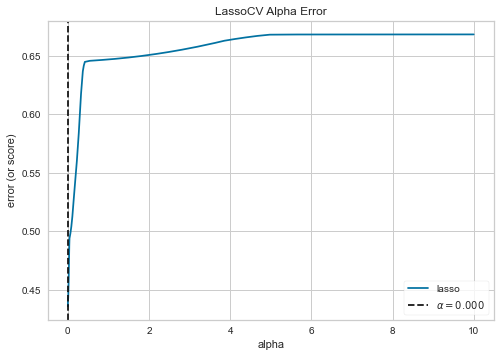

In [6]:
import numpy as np

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from yellowbrick.datasets import load_concrete


# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X, Y)
visualizer.show()

In [21]:
alpha_list=[10**x for x in range(-3,3)]

In [28]:
from sklearn.linear_model import Ridge
baseresult_ridge=[]


for alpha in alpha_list:
    ridgeregr = Ridge(alpha=alpha) 
    ridgeregr.fit(X_train, Y_train)

    Y_preds_train = ridgeregr.predict(X_train)
    Y_preds_test = ridgeregr.predict(X_test)
    baseresult_ridge.append((mse(Y_test, Y_preds_test),rmse(Y_test, Y_preds_test),ridgeregr.score(X_test, Y_test),
                         mse(Y_train, Y_preds_train),rmse(Y_train, Y_preds_train),ridgeregr.score(X_train, Y_train),alpha))
    

baseresult_ridge=pd.DataFrame(baseresult_ridge,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train','Alpha'])
baseresult_ridge

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train,Alpha
0,0.362,0.602,0.283,0.434,0.659,0.369,0.001
1,0.362,0.602,0.283,0.434,0.659,0.369,0.010
2,0.361,0.601,0.285,0.434,0.659,0.369,0.100
3,0.354,0.595,0.299,0.435,0.659,0.368,1.000
4,0.342,0.585,0.324,0.444,0.666,0.354,10.000
5,0.344,0.586,0.320,0.477,0.690,0.307,100.000


## Lasso model's statistics

In [65]:
from sklearn.linear_model import Lasso
baseresult_lasso=[]


for alpha in alpha_list:
    lassoregr = Lasso(alpha=alpha) 
    lassoregr.fit(X_train, Y_train)

    Y_preds_train = lassoregr.predict(X_train)
    Y_preds_test = lassoregr.predict(X_test)
    baseresult_lasso.append((mse(Y_test, Y_preds_test),rmse(Y_test, Y_preds_test),lassoregr.score(X_test, Y_test),
                         mse(Y_train, Y_preds_train),rmse(Y_train, Y_preds_train),lassoregr.score(X_train, Y_train),alpha))
    

baseresult_lasso=pd.DataFrame(baseresult_lasso,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train','Alpha'])
baseresult_lasso

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train,Alpha
0,0.343,0.585,0.322,0.438,0.662,0.363,0.001
1,0.343,0.585,0.322,0.468,0.684,0.320,0.010
2,0.510,0.714,-0.008,0.688,0.829,0.000,0.100
3,0.510,0.714,-0.008,0.688,0.829,0.000,1.000
4,0.510,0.714,-0.008,0.688,0.829,0.000,10.000
5,0.510,0.714,-0.008,0.688,0.829,0.000,100.000


## Get rid of outliers

In [9]:
wine_quality.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [32]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

## Define relations between quality and each columns

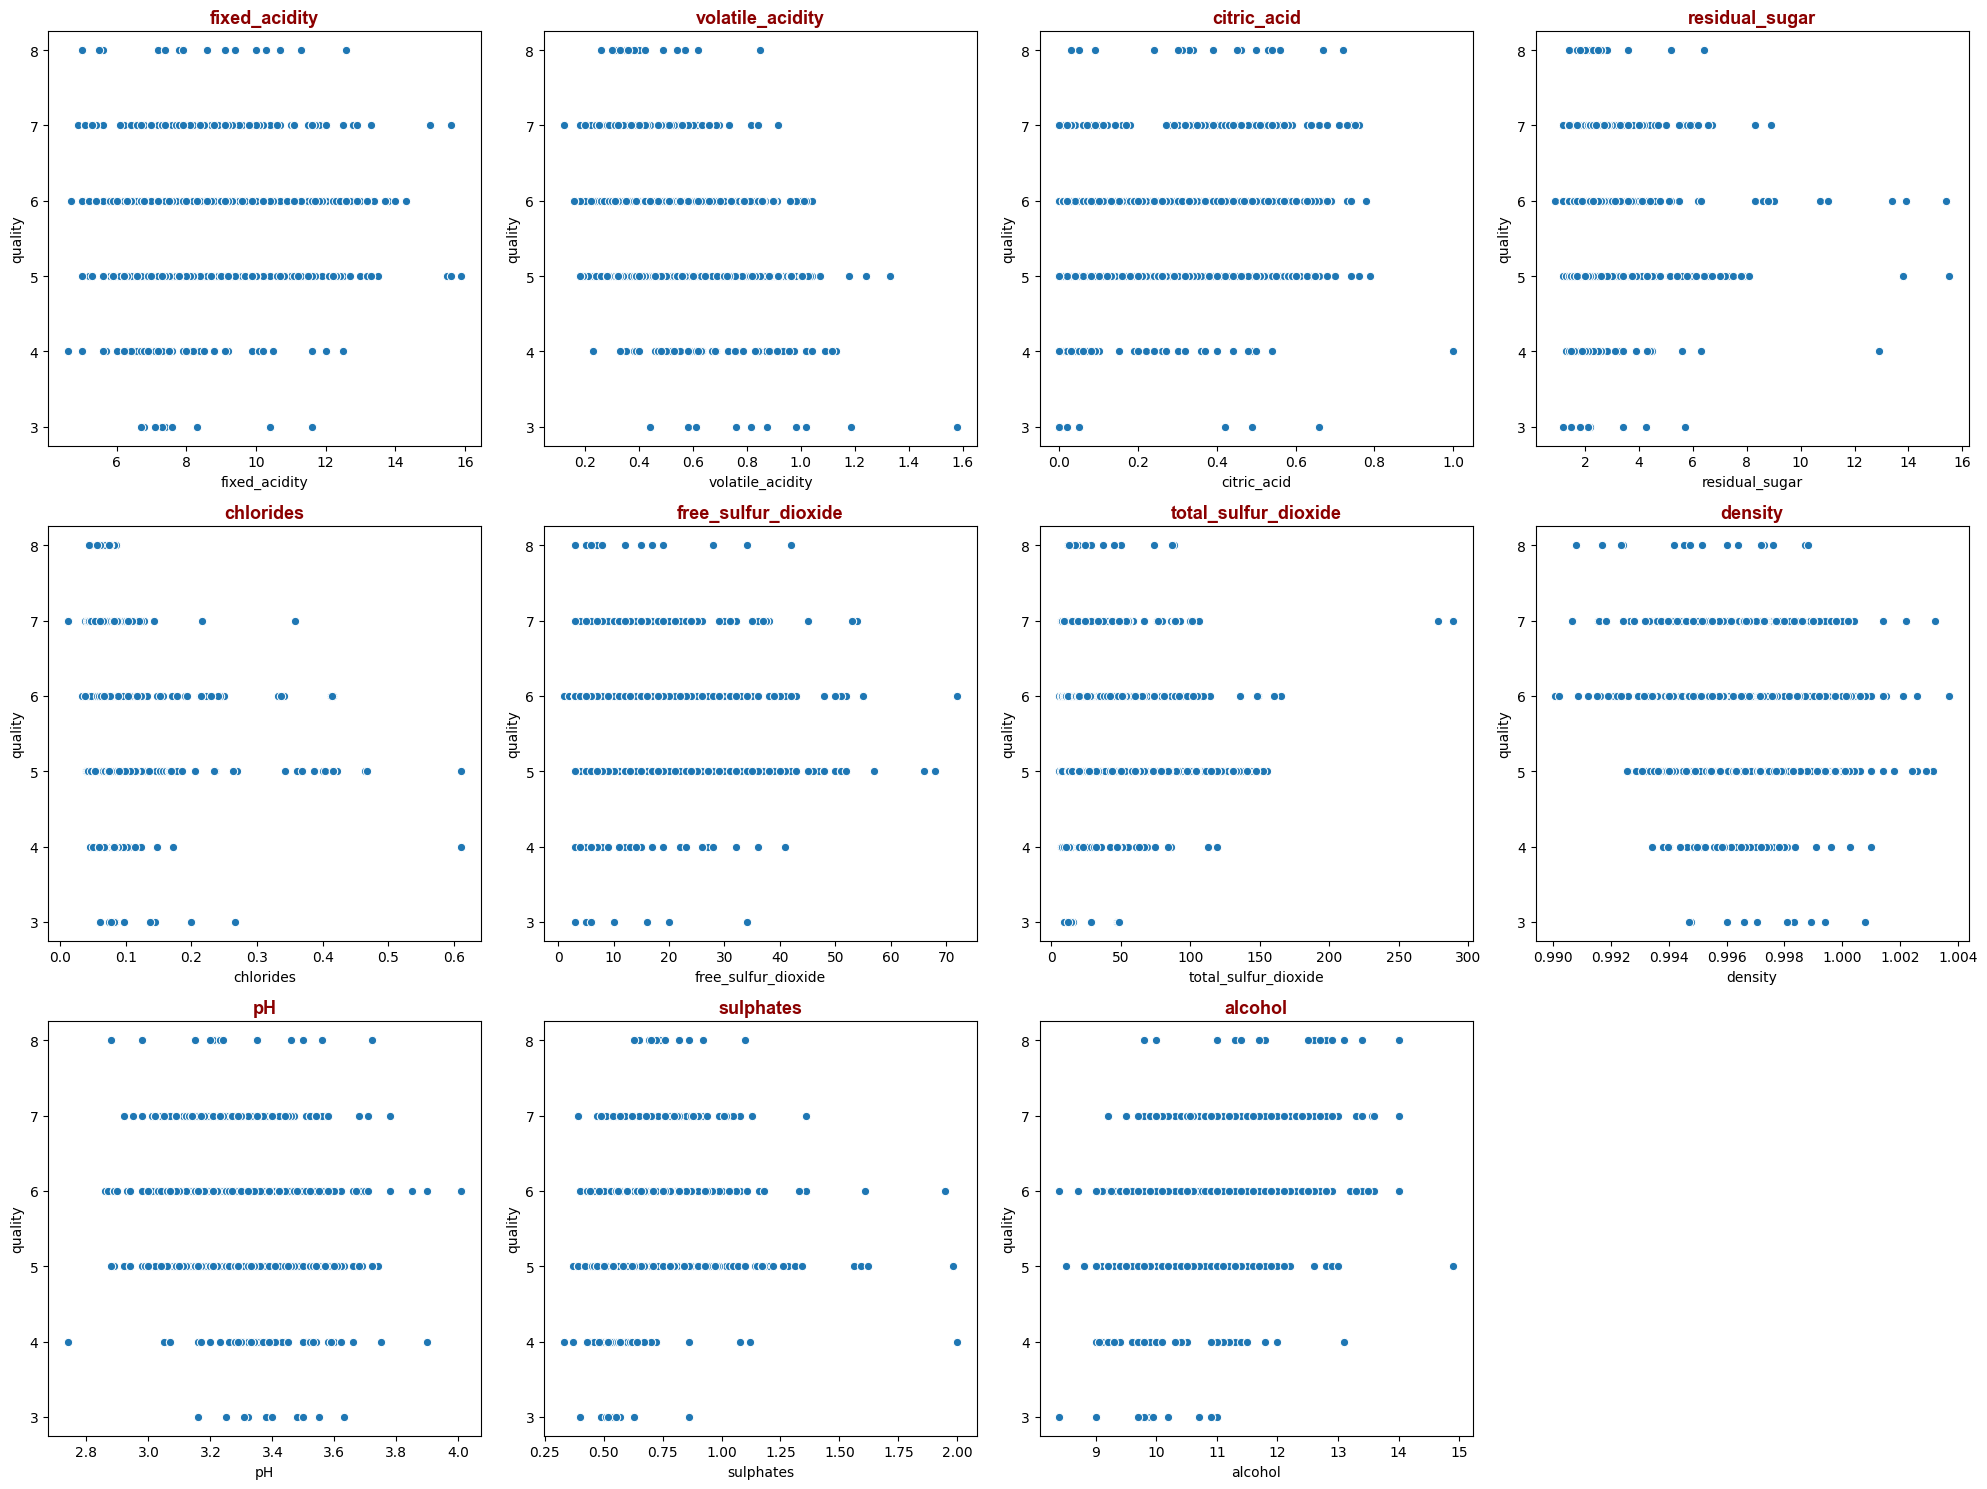

In [6]:
basemodel_columns=['fixed_acidity', 'volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']

plt.figure(figsize=(20,15))
for i in range(0,11):
    plt.subplot(3,4,i+1)
    sns.scatterplot(data=wine_quality,x=basemodel_columns[i],y='quality')
    plt.title(basemodel_columns[i], fontdict=title_font)
plt.tight_layout()
plt.show()

## Boxplot

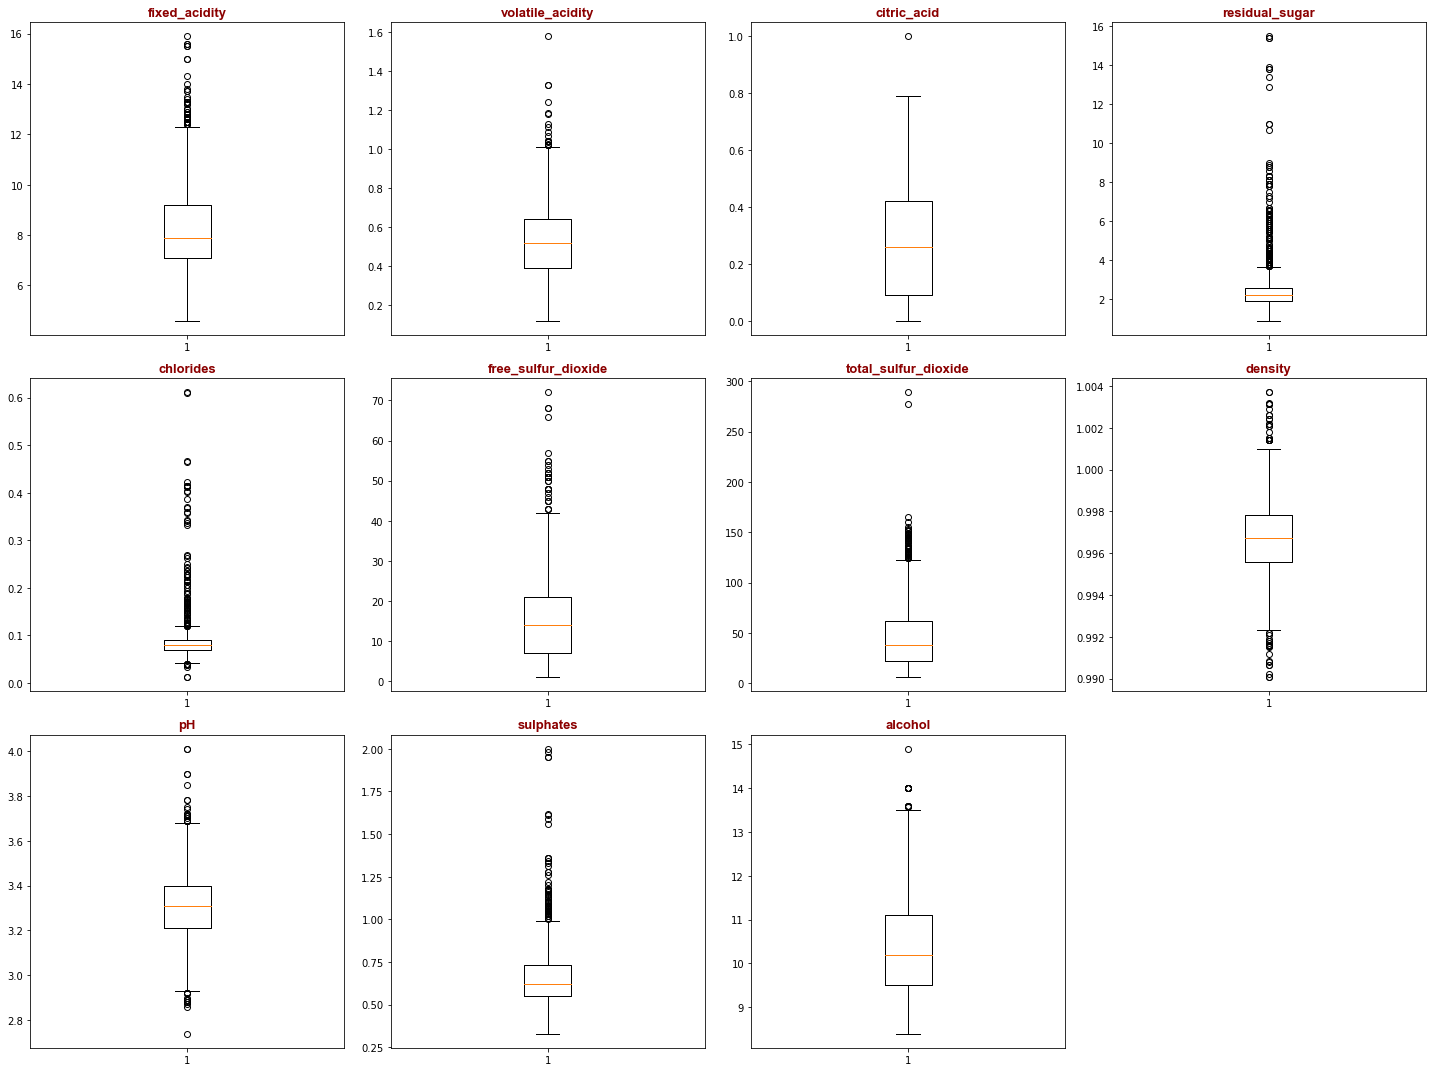

In [68]:
plt.figure(figsize=(20,15))
for i in range(0,11):
    plt.subplot(3,4,i+1)
    plt.boxplot(wine_quality[basemodel_columns[i]])
    plt.title(basemodel_columns[i], fontdict=title_font)
plt.tight_layout()
plt.show()

## Outlierslari en yuksek degere esitledik

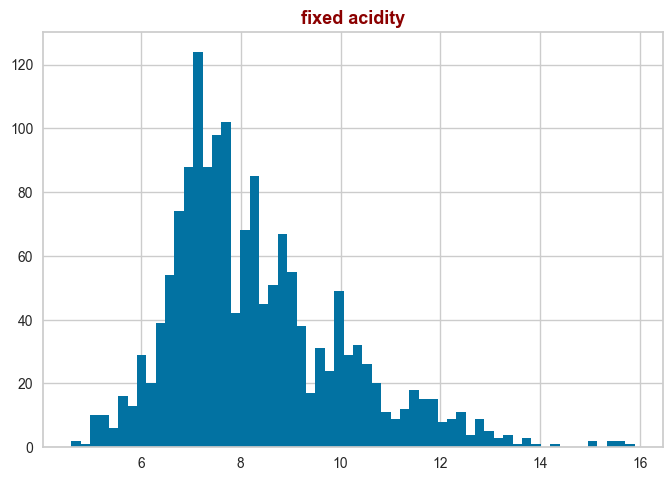

In [33]:
#plt.figure(figsize=(20,15))
#for i in range(0,11):
    #plt.subplot(3,4,i+1)
    #plt.hist(basemodel_columns[i],bins=60)
    #plt.title(basemodel_columns[i], fontdict=title_font)
#plt.tight_layout()
#plt.show()
plt.hist(wine_quality.fixed_acidity,bins=60)
plt.title('fixed acidity', fontdict=title_font)
plt.show()

In [34]:
wine_quality.fixed_acidity[wine_quality.fixed_acidity>14]=14

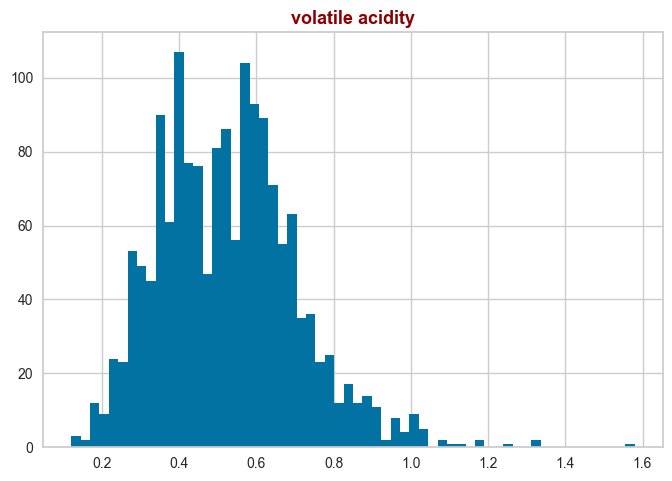

In [35]:
plt.hist(wine_quality.volatile_acidity,bins=60)
plt.title('volatile acidity', fontdict=title_font)
plt.show()

In [36]:
wine_quality.volatile_acidity[wine_quality.volatile_acidity>1.1]=1.1

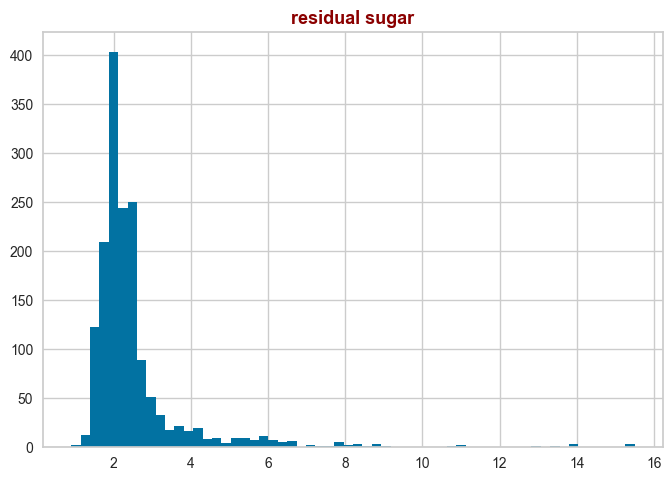

In [37]:
plt.hist(wine_quality.residual_sugar,bins=60)
plt.title('residual sugar', fontdict=title_font)
plt.show()

In [38]:
wine_quality.residual_sugar[wine_quality.residual_sugar>7]=7

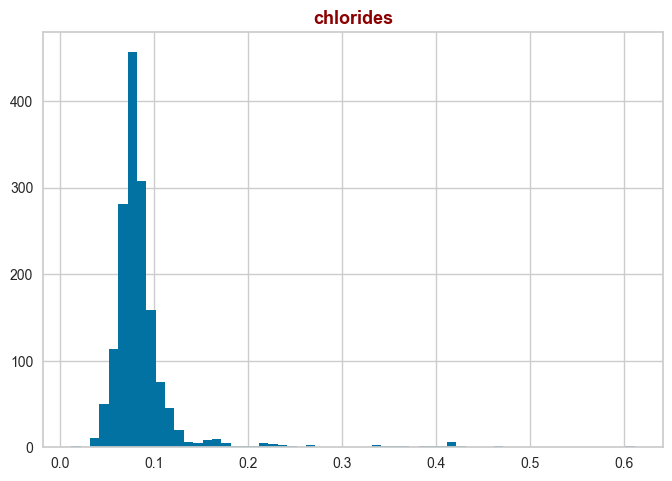

In [39]:
plt.hist(wine_quality.chlorides,bins=60)
plt.title('chlorides', fontdict=title_font)
plt.show()

In [40]:
wine_quality.chlorides[wine_quality.chlorides>0.2]=0.2

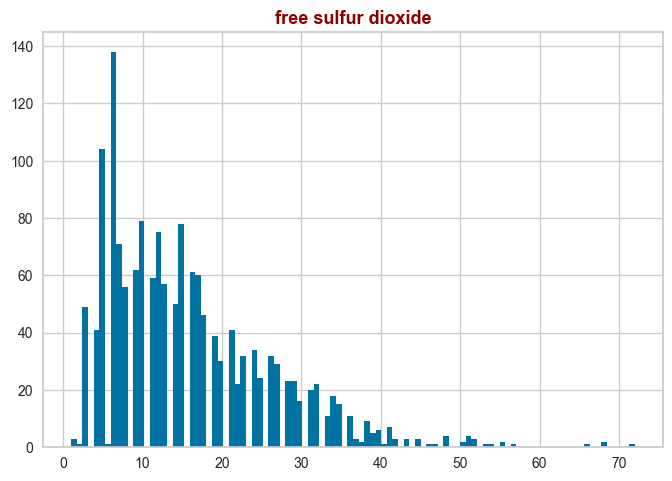

In [41]:
plt.hist(wine_quality.free_sulfur_dioxide,bins=100)
plt.title('free sulfur dioxide', fontdict=title_font)
plt.show()

In [42]:
wine_quality.free_sulfur_dioxide[wine_quality.free_sulfur_dioxide>55]=55

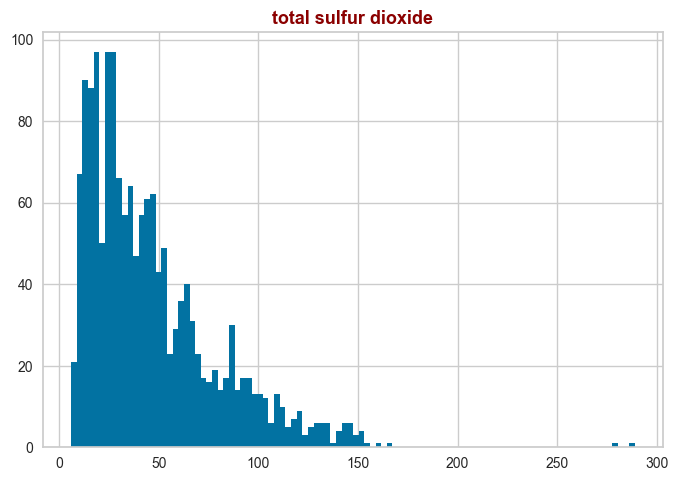

In [43]:
plt.hist(wine_quality.total_sulfur_dioxide,bins=100)
plt.title('total sulfur dioxide', fontdict=title_font)
plt.show()

In [44]:
wine_quality.total_sulfur_dioxide[wine_quality.total_sulfur_dioxide>150]=150

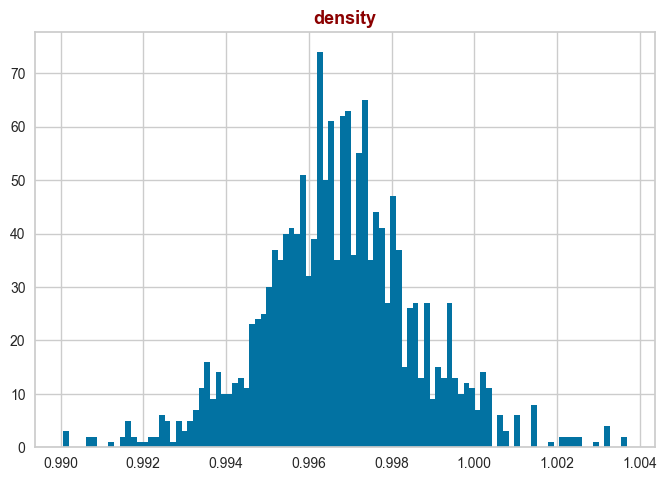

In [45]:
plt.hist(wine_quality.density,bins=100)
plt.title('density', fontdict=title_font)
plt.show()

In [46]:
wine_quality.density[wine_quality.density>1.001]=1.001

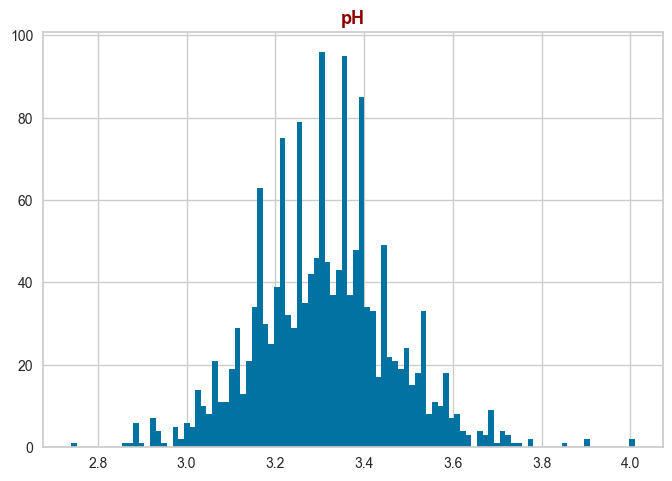

In [47]:
plt.hist(wine_quality.pH,bins=100)
plt.title('pH', fontdict=title_font)
plt.show()

In [48]:
wine_quality.pH[wine_quality.pH>3.8]=3.8

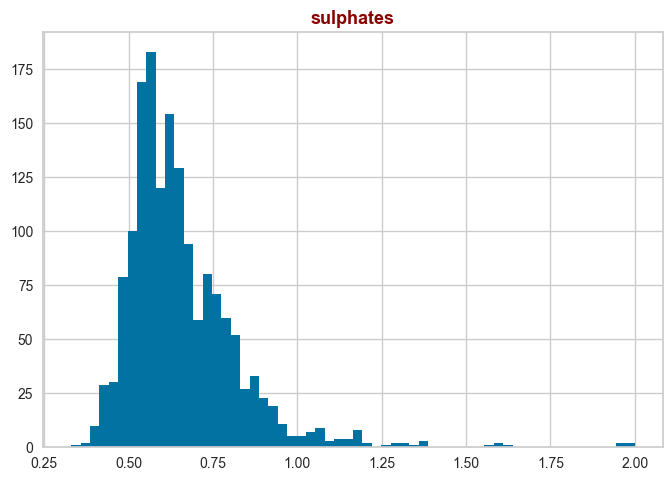

In [49]:
plt.hist(wine_quality.sulphates,bins=60)
plt.title('sulphates', fontdict=title_font)
plt.show()

In [50]:
wine_quality.sulphates[wine_quality.sulphates>1.25]=1.25

In [51]:
wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


In [52]:
Y = wine_quality['quality']
X = wine_quality[['fixed_acidity', 'volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [68]:
ols_model = LinearRegression()
ols_model.fit(X_train,Y_train)

ols_model_train_predict = ols_model.predict(X_train)
ols_model_test_predict = ols_model.predict(X_test)

winsorize_result_ols=[]
winsorize_result_ols.append((mse(Y_test,ols_model_test_predict),rmse(Y_test,ols_model_test_predict),ols_model.score(X_test,Y_test),
                         mse(Y_train, ols_model_train_predict),rmse(Y_train, ols_model_train_predict),ols_model.score(X_train,Y_train)))

winsorize_result_ols=pd.DataFrame(winsorize_result_ols,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train'])
winsorize_result_ols

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train
0,0.350,0.591,0.308,0.432,0.657,0.371


In [54]:
alpha_list=[10**x for x in range(-3,3)]

from sklearn.linear_model import Ridge
winsorize_result_ridge=[]


for alpha in alpha_list:
    ridgeregr = Ridge(alpha=alpha) 
    ridgeregr.fit(X_train, Y_train)

    Y_preds_train = ridgeregr.predict(X_train)
    Y_preds_test = ridgeregr.predict(X_test)
    winsorize_result_ridge.append((mse(Y_test, Y_preds_test),rmse(Y_test, Y_preds_test),ridgeregr.score(X_test, Y_test),
                         mse(Y_train, Y_preds_train),rmse(Y_train, Y_preds_train),ridgeregr.score(X_train, Y_train),alpha))
    

winsorize_result_ridge=pd.DataFrame(winsorize_result_ridge,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train','Alpha'])
winsorize_result_ridge

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train,Alpha
0,0.347,0.589,0.313,0.434,0.659,0.369,0.001
1,0.347,0.589,0.313,0.434,0.659,0.369,0.010
2,0.346,0.588,0.315,0.434,0.659,0.369,0.100
3,0.343,0.585,0.322,0.436,0.660,0.366,1.000
4,0.335,0.579,0.336,0.443,0.666,0.355,10.000
5,0.341,0.584,0.325,0.476,0.690,0.308,100.000


In [66]:
from sklearn.linear_model import Lasso
winsorize_result_lasso=[]


for alpha in alpha_list:
    lassoregr = Lasso(alpha=alpha) 
    lassoregr.fit(X_train, Y_train)

    Y_preds_train = lassoregr.predict(X_train)
    Y_preds_test = lassoregr.predict(X_test)
    winsorize_result_lasso.append((mse(Y_test, Y_preds_test),rmse(Y_test, Y_preds_test),lassoregr.score(X_test, Y_test),
                         mse(Y_train, Y_preds_train),rmse(Y_train, Y_preds_train),lassoregr.score(X_train, Y_train),alpha))
    

winsorize_result_lasso=pd.DataFrame(winsorize_result_lasso,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train','Alpha'])
winsorize_result_lasso

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train,Alpha
0,0.343,0.585,0.322,0.438,0.662,0.363,0.001
1,0.343,0.585,0.322,0.468,0.684,0.320,0.010
2,0.510,0.714,-0.008,0.688,0.829,0.000,0.100
3,0.510,0.714,-0.008,0.688,0.829,0.000,1.000
4,0.510,0.714,-0.008,0.688,0.829,0.000,10.000
5,0.510,0.714,-0.008,0.688,0.829,0.000,100.000


## LOG

In [56]:
wine_quality['fixed_acidity']=np.log(wine_quality.fixed_acidity+1)
wine_quality['volatile_acidity']=np.log(wine_quality.volatile_acidity+1)
wine_quality['citric_acid']=np.log(wine_quality.citric_acid+1)
wine_quality['residual_sugar']=np.log(wine_quality.residual_sugar+1)
wine_quality['chlorides']=np.log(wine_quality.chlorides+1)
wine_quality['free_sulfur_dioxide']=np.log(wine_quality.free_sulfur_dioxide+1)
wine_quality['total_sulfur_dioxide']=np.log(wine_quality.total_sulfur_dioxide+1)
wine_quality['density']=np.log(wine_quality.density+1)
wine_quality['pH']=np.log(wine_quality.pH+1)
wine_quality['sulphates']=np.log(wine_quality.sulphates+1)
wine_quality['alcohol']=np.log(wine_quality.alcohol+1)

In [57]:
X.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [58]:
Y = wine_quality['quality']
X = wine_quality[['fixed_acidity', 'volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [60]:
ols_model = LinearRegression()
ols_model.fit(X_train,Y_train)

ols_model_train_predict = ols_model.predict(X_train)
ols_model_test_predict = ols_model.predict(X_test)

wins_log_ols=[]
wins_log_ols.append((mse(Y_test, Y_preds_test),rmse(Y_test, Y_preds_test),ridgeregr.score(X_test, Y_test),
                         mse(Y_train, Y_preds_train),rmse(Y_train, Y_preds_train),ridgeregr.score(X_train, Y_train)))

wins_log_ols=pd.DataFrame(wins_log_ols,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train'])
wins_log_ols

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train
0,0.510,0.714,-0.008,0.688,0.829,0.000


In [61]:
alpha_list=[10**x for x in range(-3,3)]

In [62]:
from sklearn.linear_model import Ridge
wins_log_ridge=[]


for alpha in alpha_list:
    ridgeregr = Ridge(alpha=alpha) 
    ridgeregr.fit(X_train, Y_train)

    Y_preds_train = ridgeregr.predict(X_train)
    Y_preds_test = ridgeregr.predict(X_test)
    wins_log_ridge.append((mse(Y_test, Y_preds_test),rmse(Y_test, Y_preds_test),ridgeregr.score(X_test, Y_test),
                         mse(Y_train, Y_preds_train),rmse(Y_train, Y_preds_train),ridgeregr.score(X_train, Y_train),alpha))
    

wins_log_ridge=pd.DataFrame(wins_log_ridge,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train','Alpha'])
wins_log_ridge

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train,Alpha
0,0.351,0.592,0.306,0.433,0.658,0.371,0.001
1,0.351,0.592,0.306,0.433,0.658,0.371,0.010
2,0.348,0.590,0.311,0.433,0.658,0.370,0.100
3,0.339,0.582,0.330,0.437,0.661,0.364,1.000
4,0.340,0.583,0.327,0.477,0.691,0.306,10.000
5,0.418,0.647,0.172,0.596,0.772,0.133,100.000


In [63]:
from sklearn.linear_model import Lasso
wins_log_lasso=[]


for alpha in alpha_list:
    ridgeregr = Lasso(alpha=alpha) 
    ridgeregr.fit(X_train, Y_train)

    Y_preds_train = ridgeregr.predict(X_train)
    Y_preds_test = ridgeregr.predict(X_test)
    wins_log_lasso.append((mse(Y_test, Y_preds_test),rmse(Y_test, Y_preds_test),ridgeregr.score(X_test, Y_test),
                         mse(Y_train, Y_preds_train),rmse(Y_train, Y_preds_train),ridgeregr.score(X_train, Y_train),alpha))
    

wins_log_lasso=pd.DataFrame(wins_log_lasso,columns=['mse Test','Rmse Test','RSquare Test','mse Train','Rmse Train','RSquare Train','Alpha'])
wins_log_lasso

,mse Test,Rmse Test,RSquare Test,mse Train,Rmse Train,RSquare Train,Alpha
0,0.343,0.585,0.322,0.438,0.662,0.363,0.001
1,0.343,0.585,0.322,0.468,0.684,0.320,0.010
2,0.510,0.714,-0.008,0.688,0.829,0.000,0.100
3,0.510,0.714,-0.008,0.688,0.829,0.000,1.000
4,0.510,0.714,-0.008,0.688,0.829,0.000,10.000
5,0.510,0.714,-0.008,0.688,0.829,0.000,100.000
